In [9]:
pip install networkx matplotlib

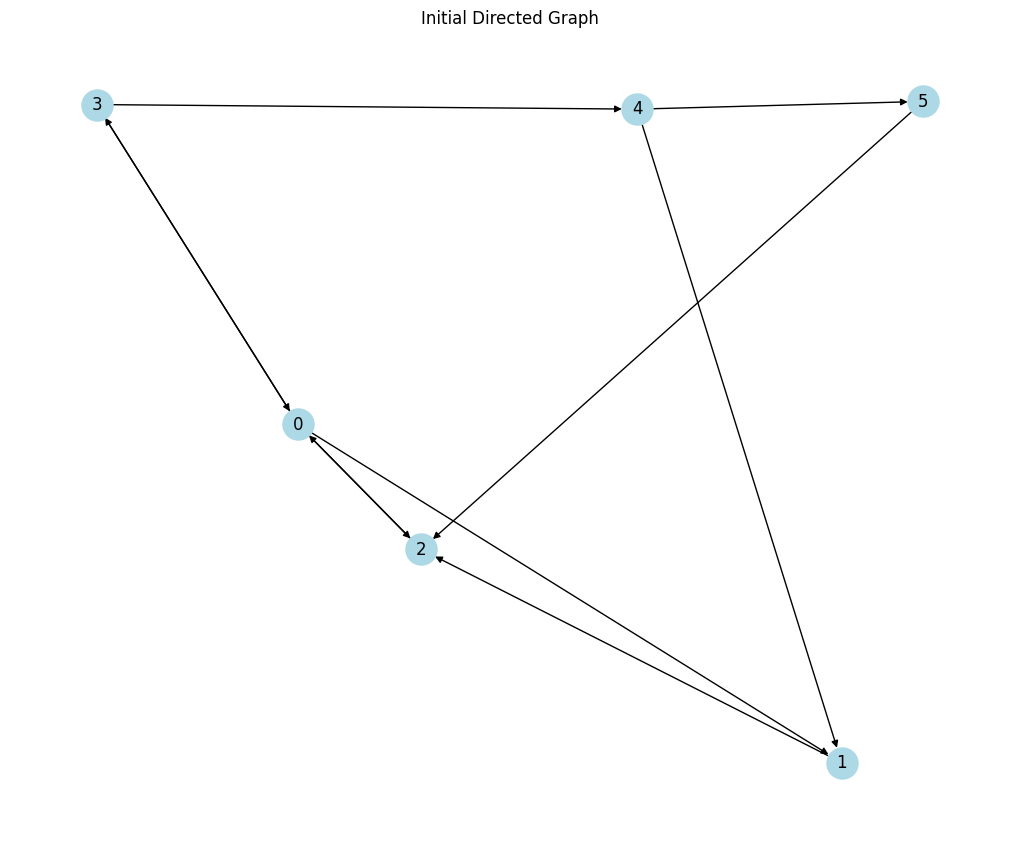

Initial Authority Scores: [1. 1. 1. 1. 1. 1.]
Initial Hub Scores: [1. 1. 1. 1. 1. 1.]
Iteration 1:
Authority Scores: [0.4472136  0.4472136  0.67082039 0.2236068  0.2236068  0.2236068 ]
Hub Scores: [0.4472136  0.4472136  0.67082039 0.2236068  0.2236068  0.2236068 ]



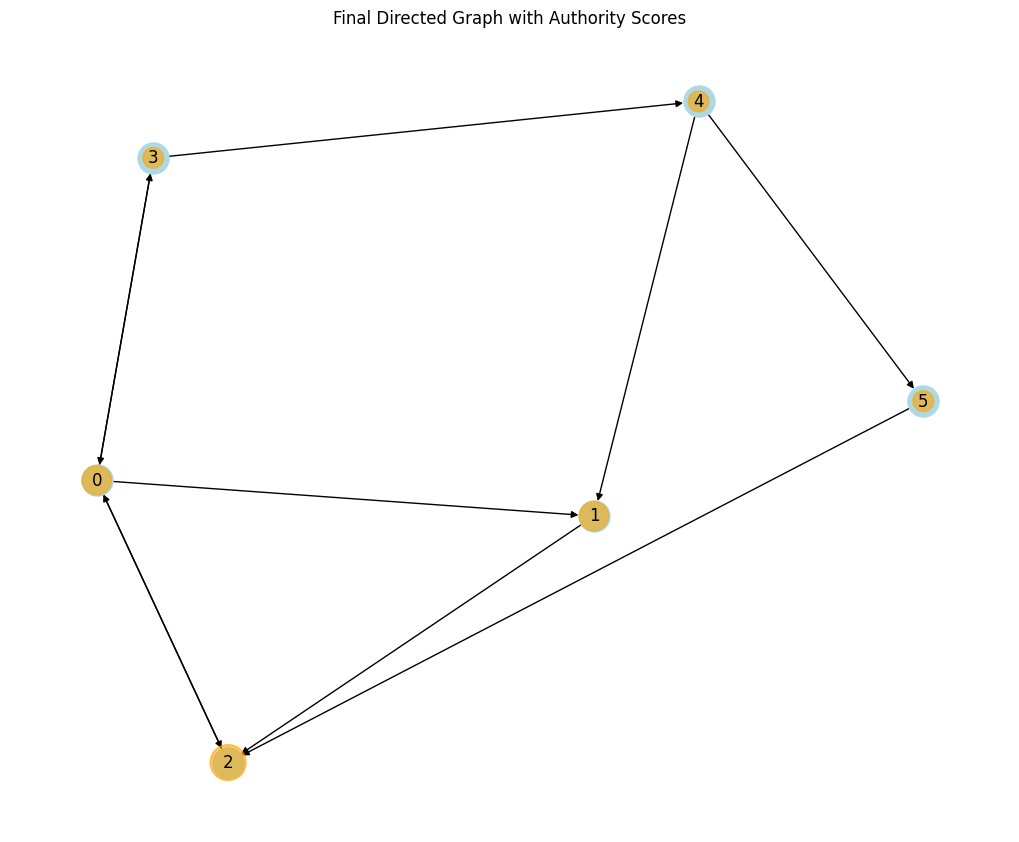

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
def hits_algorithm(links, max_iterations=100, tol=1e-6):
    n = len(links)
    authority_scores = np.ones(n)
    hub_scores = np.ones(n)
    print("Initial Authority Scores:", authority_scores)
    print("Initial Hub Scores:", hub_scores)
    for iteration in range(max_iterations):
        new_authority_scores = np.zeros(n)
        new_hub_scores = np.zeros(n)
        for i in range(n):
            for j in links[i]:
                new_authority_scores[j] += hub_scores[i]
        for j in range(n):
            for i in links[j]:
                new_hub_scores[i] += authority_scores[j]
        authority_scores = new_authority_scores
        hub_scores = new_hub_scores
        authority_scores /= np.linalg.norm(authority_scores, 2)
        hub_scores /= np.linalg.norm(hub_scores, 2)
        print(f"Iteration {iteration + 1}:")
        print("Authority Scores:", authority_scores)
        print("Hub Scores:", hub_scores)
        print()
        if np.linalg.norm(new_authority_scores - authority_scores, 2) < tol and np.linalg.norm(new_hub_scores - hub_scores, 2) < tol:
            break
    return authority_scores, hub_scores
links = [[1, 2, 3],[2],[0],[0, 4],[1, 5],[2]]
G_initial = nx.DiGraph()
for i, neighbors in enumerate(links):
    for neighbor in neighbors:
        G_initial.add_edge(i, neighbor)
plt.figure(figsize=(10, 8))
pos_initial = nx.spring_layout(G_initial)
nx.draw(G_initial, pos_initial, with_labels=True, node_size=500, node_color='lightblue', arrows=True)
plt.title('Initial Directed Graph')
plt.show()
authority_scores, hub_scores = hits_algorithm(links)
G_final = nx.DiGraph()
for i, neighbors in enumerate(links):
    for neighbor in neighbors:
        G_final.add_edge(i, neighbor)
plt.figure(figsize=(10, 8))
pos_final = nx.spring_layout(G_final)
nx.draw(G_final, pos_final, with_labels=True, node_size=500, node_color='lightblue', arrows=True)
node_sizes = 1000 * authority_scores
nx.draw_networkx_nodes(G_final, pos_final, node_size=node_sizes, node_color='orange', alpha=0.6)
plt.title('Final Directed Graph with Authority Scores')
plt.show()

[(array([178, 252,  52,  57]), 282.4961994582748), (array([178, 252,  52, 251]), 252.74536977698705), (array([178, 252,  52, 251]), 252.74536977698705)]


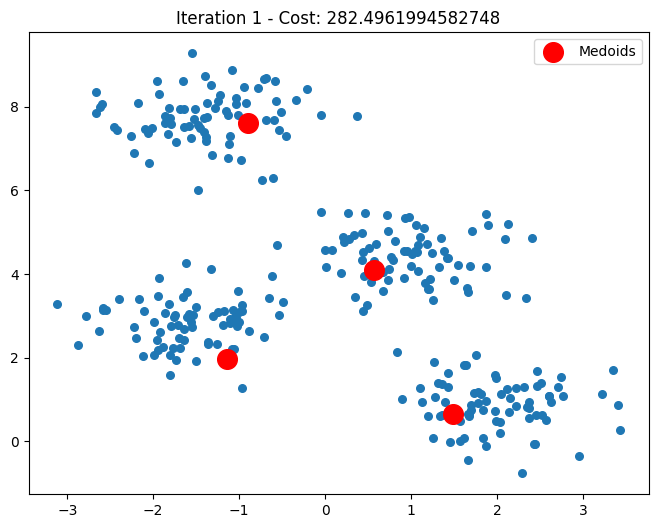

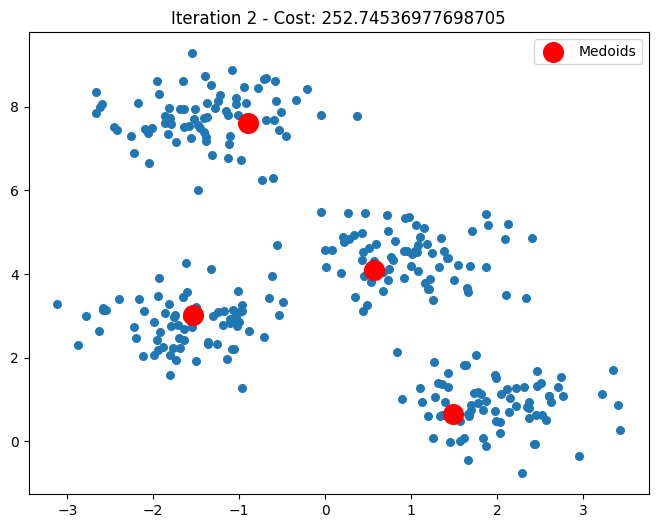

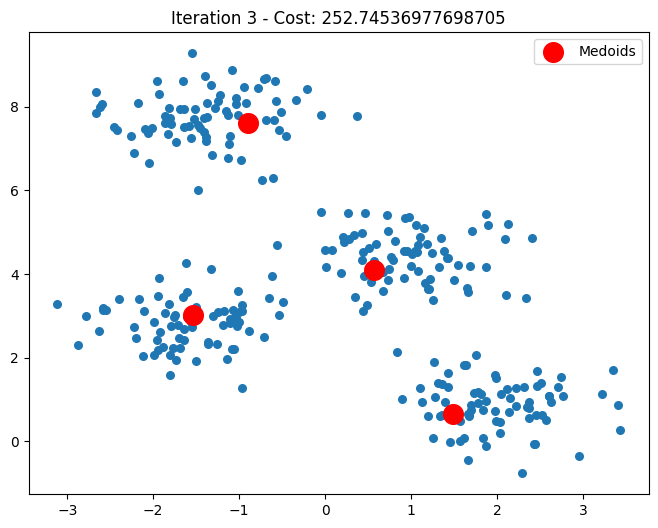

Final Medoids: [[ 0.57279381  4.08805543]
 [ 1.48859977  0.65163384]
 [-0.89432788  7.61714473]
 [-1.53631328  3.01443916]]
Final Cost: 252.74536977698705


In [21]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
def calculate_cost(data, medoids):
    return sum(np.min(pairwise_distances(data, data[medoids]), axis=1))
def clarans(data, num_clusters, max_iterations=100, max_local_search=5):
    num_points = data.shape[0]
    medoids = np.random.choice(num_points, size=num_clusters, replace=False)
    best_medoids = medoids.copy()
    best_cost = calculate_cost(data, medoids)
    history = []
    for iteration in range(max_iterations):
        iteration_cost = best_cost
        iteration_medoids = best_medoids.copy()
        for i in range(num_clusters):
            current_medoid = medoids[i]
            for _ in range(max_local_search):
                neighbors = [x for x in range(num_points) if x != current_medoid]
                new_medoid = np.random.choice(neighbors)
                new_medoids = medoids.copy()
                new_medoids[i] = new_medoid
                new_cost = calculate_cost(data, new_medoids)
                if new_cost < best_cost:
                    best_cost = new_cost
                    best_medoids = new_medoids.copy()
                    medoids = new_medoids.copy()
        history.append((best_medoids.copy(), best_cost))
        if np.array_equal(medoids, iteration_medoids):
            break
    return history
if __name__ == "__main__":
    data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    num_clusters = 4
    history = clarans(data, num_clusters)
    print(history)
    for i, (medoids, cost) in enumerate(history):
        plt.figure(figsize=(8, 6))
        plt.scatter(data[:, 0], data[:, 1], s=30)
        plt.scatter(data[medoids, 0], data[medoids, 1], s=200, color='red', label='Medoids')
        plt.title(f'Iteration {i + 1} - Cost: {cost}')
        plt.legend()
        plt.show()
    final_medoids, final_cost = history[-1]
    print("Final Medoids:", data[final_medoids])
    print("Final Cost:", final_cost)